In [424]:
import numpy as np
import pandas as pd
import missingno as no
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('Dry_Bean_Dataset.csv')
df.head()
profile = ProfileReport(df)
profile.to_file(output_file="Dry_Bean_Dataset.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

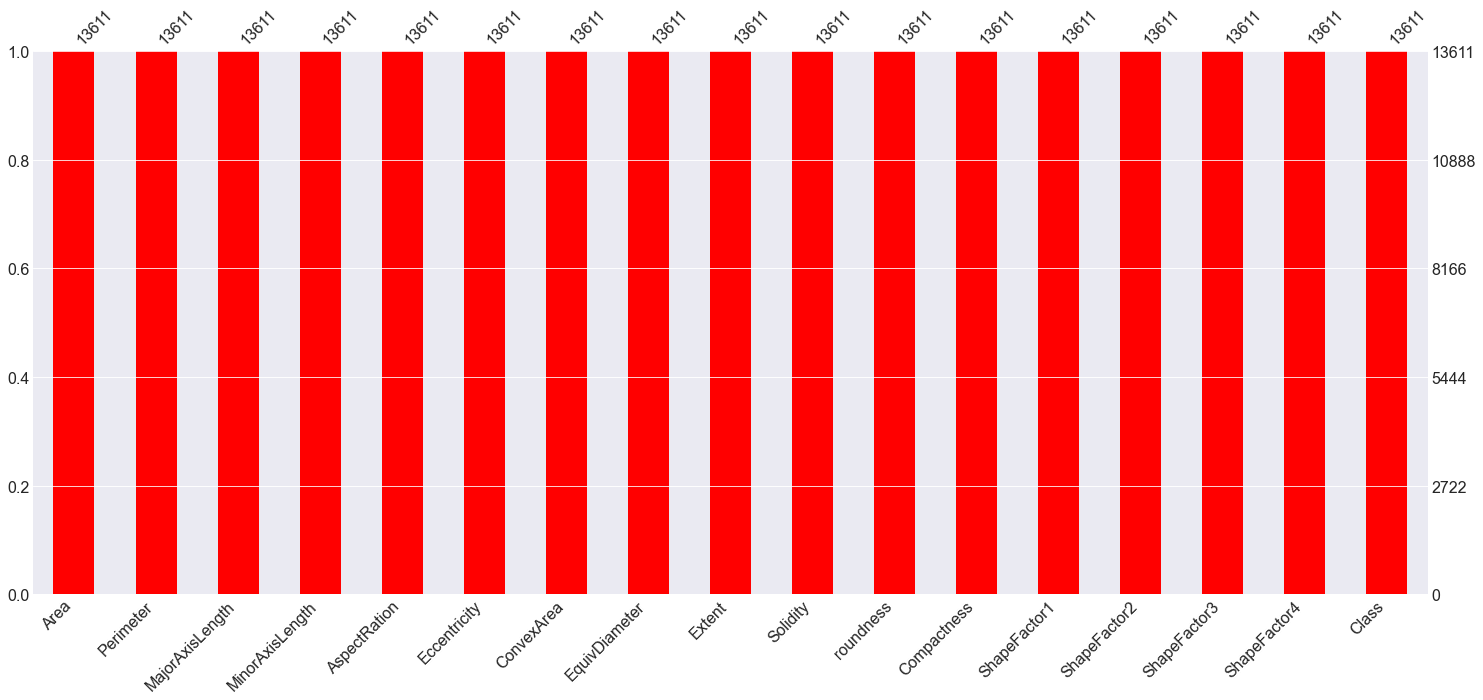

In [343]:
no.bar(df, color='red')

C:\Users\92318\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


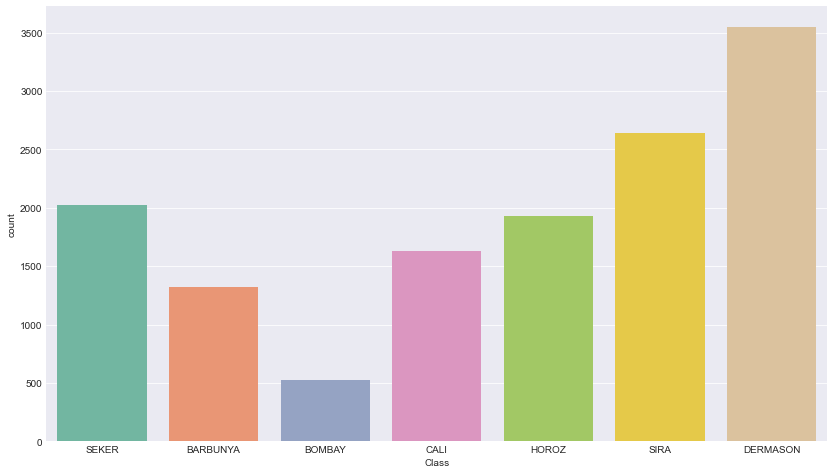

In [344]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-darkgrid')
sns.countplot(df.Class, palette='Set2')
plt.show()

In [345]:
df2 = df.drop_duplicates()

# under sampling to remove class imbalace 

In [346]:
mino_class=len(df[df['Class']=='BOMBAY'])
print(mino_class)

522


In [347]:
majo_class_index=df[df['Class']=='DERMASON'].index
print(majo_class_index)

Int64Index([10065, 10066, 10067, 10068, 10069, 10070, 10071, 10072, 10073,
            10074,
            ...
            13601, 13602, 13603, 13604, 13605, 13606, 13607, 13608, 13609,
            13610],
           dtype='int64', length=3546)


In [348]:
mino_class_index=df[df['Class']=='BOMBAY'].index
random_majority_indices=np.random.choice(majo_class_index,mino_class,replace=False)
under_sample_indices=np.concatenate([mino_class_index,random_majority_indices])
majo_class_index=df[df['Class']=='SIRA'].index
random_majority_indices=np.random.choice(majo_class_index,mino_class,replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])
majo_class_index=df[df['Class']=='SEKER'].index
random_majority_indices=np.random.choice(majo_class_index,mino_class,replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])
majo_class_index=df[df['Class']=='HOROZ'].index
random_majority_indices=np.random.choice(majo_class_index,mino_class,replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])
majo_class_index=df[df['Class']=='CALI'].index
random_majority_indices=np.random.choice(majo_class_index,mino_class,replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])
majo_class_index=df[df['Class']=='BARBUNYA'].index
random_majority_indices=np.random.choice(majo_class_index,mino_class,replace=False)
under_sample_indices=np.concatenate([under_sample_indices,random_majority_indices])
data=df.loc[under_sample_indices]
data.Class.value_counts()

BOMBAY      522
DERMASON    522
SIRA        522
SEKER       522
HOROZ       522
CALI        522
BARBUNYA    522
Name: Class, dtype: int64

C:\Users\92318\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


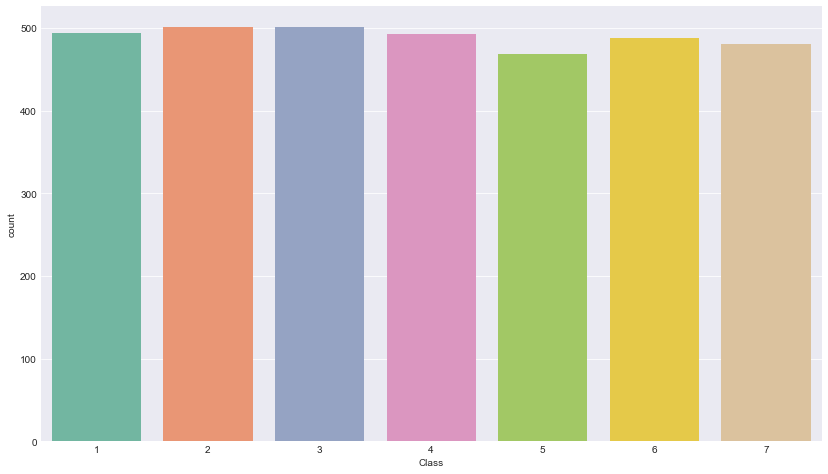

In [431]:
plt.figure(figsize=(14,8))
plt.style.use('seaborn-darkgrid')
sns.countplot(data.Class, palette='Set2')
plt.show()

# changing class from catagorical to numerical 

In [349]:
data.replace(['SIRA','BOMBAY','DERMASON', 'BARBUNYA', 'HOROZ', 'CALI', 'SEKER',], [1,2,3,4,5,6,7], inplace=True)


#l3 = LabelEncoder()
#label = l3.fit_transform(df["Class"])
#data = df.drop("Class", axis='columns')
#data["Class"] = label
#data

<AxesSubplot:xlabel='Class', ylabel='Area'>

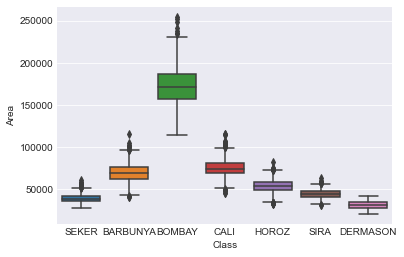

In [350]:
sns.boxplot(x = "Class"  , y = "Area" , data=df )


<AxesSubplot:xlabel='Class', ylabel='Perimeter'>

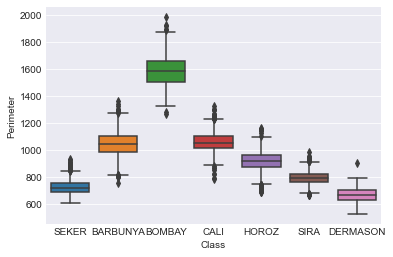

In [351]:
sns.boxplot(x = "Class"  , y = 'Perimeter' , data=df )


<AxesSubplot:xlabel='Class', ylabel='EquivDiameter'>

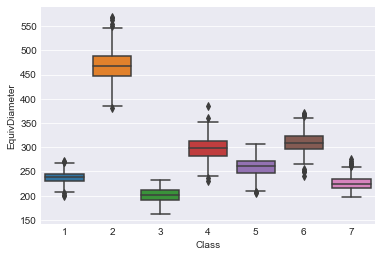

In [352]:
sns.boxplot(x=data.Class,y=data.EquivDiameter)


<AxesSubplot:xlabel='Class', ylabel='MajorAxisLength'>

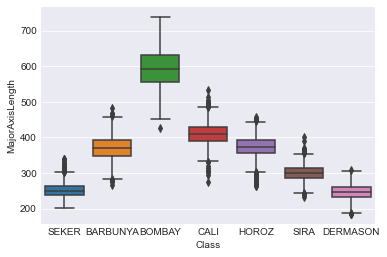

In [353]:
sns.boxplot(x = "Class"  , y = 'MajorAxisLength' , data=df )

<AxesSubplot:xlabel='Class', ylabel='MinorAxisLength'>

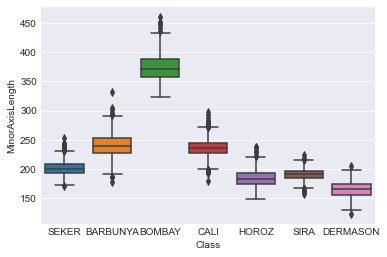

In [354]:
sns.boxplot(x = "Class"  , y = 'MinorAxisLength' , data=df )


<AxesSubplot:xlabel='Class', ylabel='AspectRation'>

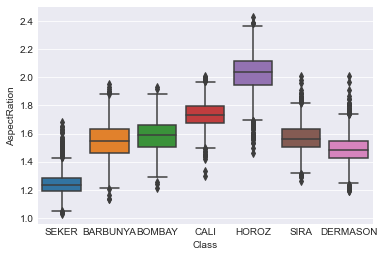

In [355]:
sns.boxplot(x = "Class"  , y = 'AspectRation' , data=df )


<AxesSubplot:xlabel='Class', ylabel='Eccentricity'>

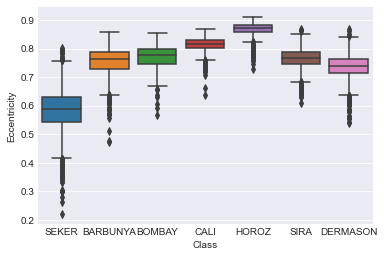

In [356]:
sns.boxplot(x = "Class"  , y = 'Eccentricity' , data=df )



# Removing outliers 

In [357]:
def outlierdetection(data):
    sorted(data)
    
    Q1,Q3=np.percentile(data,[25,75])
    
    IQR=Q3-Q1
    
    lower_range=Q1-(1.5*IQR)
    
    Upper_range=Q3+(1.5*IQR)
    
    return lower_range,Upper_range

In [358]:
data.Class.unique()

array([2, 3, 1, 7, 5, 6, 4], dtype=int64)

<AxesSubplot:xlabel='Class', ylabel='EquivDiameter'>

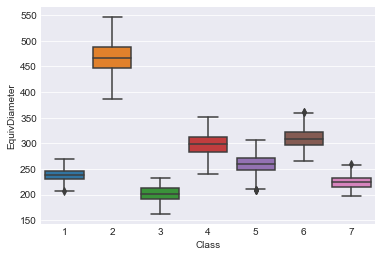

In [359]:
j2=data[data.Class == 1].EquivDiameter
lr,ur=outlierdetection(j2)
data.drop(data.index[(data.Class ==1) &( data.EquivDiameter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==1) &( data.EquivDiameter >= ur)],inplace=True)
j1=data[data.Class == 2].EquivDiameter
lr,ur=outlierdetection(j1)
data.drop(data.index[(data.Class ==2) &( data.EquivDiameter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==2) &( data.EquivDiameter >= ur)],inplace=True)
j3=data[data.Class == 3].EquivDiameter
lr,ur=outlierdetection(j3)
data.drop(data.index[(data.Class ==3) &( data.EquivDiameter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==3) &( data.EquivDiameter >= ur)],inplace=True)
j4=data[data.Class == 4].EquivDiameter
lr,ur=outlierdetection(j4)
data.drop(data.index[(data.Class ==4) &( data.EquivDiameter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==4) &( data.EquivDiameter >= ur)],inplace=True)
j5=data[data.Class == 5].EquivDiameter
lr,ur=outlierdetection(j5)
data.drop(data.index[(data.Class ==5) &( data.EquivDiameter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==5) &( data.EquivDiameter >= ur)],inplace=True)
j6=data[data.Class == 6].EquivDiameter
lr,ur=outlierdetection(j6)
data.drop(data.index[(data.Class ==6) &( data.EquivDiameter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==6) &( data.EquivDiameter >= ur)],inplace=True)
j7=data[data.Class == 7].EquivDiameter
lr,ur=outlierdetection(j7)
data.drop(data.index[(data.Class ==7) &( data.EquivDiameter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==7) &( data.EquivDiameter >= ur)],inplace=True)


sns.boxplot(x='Class',y='EquivDiameter',data=data)

<AxesSubplot:xlabel='Class', ylabel='ShapeFactor3'>

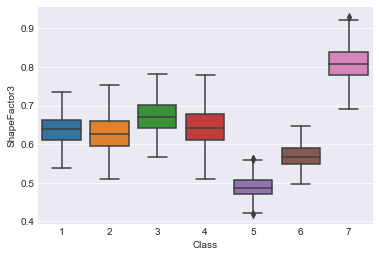

In [360]:
i1=data[data.Class == 1].ShapeFactor3
lr,ur=outlierdetection(i1)
data.drop(data.index[(data.Class ==1) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==1) &( data.ShapeFactor3 >= ur)],inplace=True)
i2=data[data.Class == 2].ShapeFactor3
lr,ur=outlierdetection(i2)
data.drop(data.index[(data.Class ==2) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==2) &( data.ShapeFactor3 >= ur)],inplace=True)
i3=data[data.Class == 3].ShapeFactor3
lr,ur=outlierdetection(i3)
data.drop(data.index[(data.Class ==3) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==3) &( data.ShapeFactor3 >= ur)],inplace=True)
i4=data[data.Class ==4].ShapeFactor3
lr,ur=outlierdetection(i4)
data.drop(data.index[(data.Class ==4) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==4) &( data.ShapeFactor3 >= ur)],inplace=True)
i5=data[data.Class == 5].ShapeFactor3
lr,ur=outlierdetection(i5)
data.drop(data.index[(data.Class ==5) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==5) &( data.ShapeFactor3 >= ur)],inplace=True)
i6=data[data.Class == 6].ShapeFactor3
lr,ur=outlierdetection(i6)
data.drop(data.index[(data.Class ==6) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==6) &( data.ShapeFactor3 >= ur)],inplace=True)
i7=data[data.Class == 7].ShapeFactor3
lr,ur=outlierdetection(i7)
data.drop(data.index[(data.Class ==7) &( data.ShapeFactor3 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==7) &( data.ShapeFactor3 >= ur)],inplace=True)
sns.boxplot(x='Class',y='ShapeFactor3',data=data)


<AxesSubplot:xlabel='Class', ylabel='ShapeFactor2'>

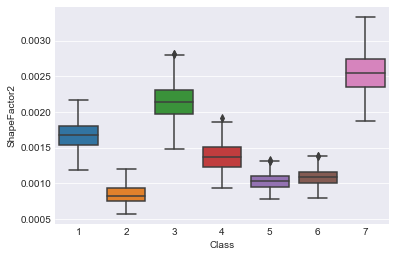

In [361]:
h1=data[data.Class == 1].ShapeFactor2
lr,ur=outlierdetection(h1)
data.drop(data.index[(data.Class ==1) &( data.ShapeFactor2 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==1) &( data.ShapeFactor2 >= ur)],inplace=True)
h2=data[data.Class == 2].ShapeFactor2
lr,ur=outlierdetection(h2)
data.drop(data.index[(data.Class ==2) &( data.ShapeFactor2 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==2) &( data.ShapeFactor2 >= ur)],inplace=True)
h3=data[data.Class == 3].ShapeFactor2
lr,ur=outlierdetection(h3)
data.drop(data.index[(data.Class ==3) &( data.ShapeFactor2 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==3) &( data.ShapeFactor2 >= ur)],inplace=True)
h4=data[data.Class == 4].ShapeFactor2
lr,ur=outlierdetection(h4)
data.drop(data.index[(data.Class ==4) &( data.ShapeFactor2 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==4) &( data.ShapeFactor2 >= ur)],inplace=True)
h5=data[data.Class == 5].ShapeFactor2
lr,ur=outlierdetection(h5)
data.drop(data.index[(data.Class ==5) &( data.ShapeFactor2 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==5) &( data.ShapeFactor2 >= ur)],inplace=True)
h6=data[data.Class == 6].ShapeFactor2
lr,ur=outlierdetection(h6)
data.drop(data.index[(data.Class ==6) &( data.ShapeFactor2 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==6) &( data.ShapeFactor2 >= ur)],inplace=True)
h7=data[data.Class == 7].ShapeFactor2
lr,ur=outlierdetection(h7)
data.drop(data.index[(data.Class ==7) &( data.ShapeFactor2 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==7) &( data.ShapeFactor2 >= ur)],inplace=True)
sns.boxplot(x='Class',y='ShapeFactor2',data=data)

<AxesSubplot:xlabel='Class', ylabel='ShapeFactor1'>

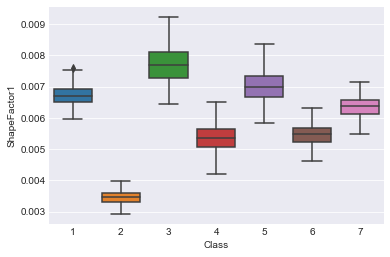

In [362]:
g1=data[data.Class == 1].ShapeFactor1
lr,ur=outlierdetection(g1)
data.drop(data.index[(data.Class ==1) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==1) &( data.ShapeFactor1 >= ur)],inplace=True)
g2=data[data.Class == 2].ShapeFactor1
lr,ur=outlierdetection(g2)
data.drop(data.index[(data.Class ==2) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==2) &( data.ShapeFactor1 >= ur)],inplace=True)
g3=data[data.Class == 3].ShapeFactor1
lr,ur=outlierdetection(g3)
data.drop(data.index[(data.Class ==3) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==3) &( data.ShapeFactor1 >= ur)],inplace=True)
g4=data[data.Class == 4].ShapeFactor1
lr,ur=outlierdetection(g4)
data.drop(data.index[(data.Class ==4) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==4) &( data.ShapeFactor1 >= ur)],inplace=True)
g5=data[data.Class == 5].ShapeFactor1
lr,ur=outlierdetection(g5)
data.drop(data.index[(data.Class ==5) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==5) &( data.ShapeFactor1 >= ur)],inplace=True)
g6=data[data.Class == 6].ShapeFactor1
lr,ur=outlierdetection(g6)
data.drop(data.index[(data.Class ==6) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==6) &( data.ShapeFactor1 >= ur)],inplace=True)
g7=data[data.Class == 7].ShapeFactor1
lr,ur=outlierdetection(g7)
data.drop(data.index[(data.Class ==7) &( data.ShapeFactor1 <= lr)],inplace=True)
data.drop(data.index[(data.Class ==7) &( data.ShapeFactor1 >= ur)],inplace=True)
sns.boxplot(x='Class',y='ShapeFactor1',data=data)

<AxesSubplot:xlabel='Class', ylabel='MajorAxisLength'>

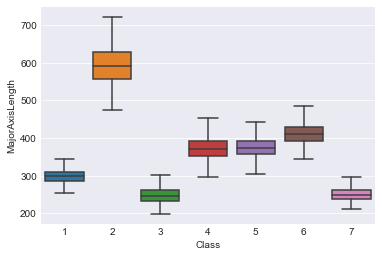

In [363]:
f1=data[data.Class == 1].MajorAxisLength
lr,ur=outlierdetection(f1)
data.drop(data.index[(data.Class ==1) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==1) &( data.MajorAxisLength >= ur)],inplace=True)
f2=data[data.Class == 2].MajorAxisLength
lr,ur=outlierdetection(f2)
data.drop(data.index[(data.Class ==2) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==2) &( data.MajorAxisLength >= ur)],inplace=True)
f3=data[data.Class == 3].MajorAxisLength
lr,ur=outlierdetection(f3)
data.drop(data.index[(data.Class ==3) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==3) &( data.MajorAxisLength >= ur)],inplace=True)
f4=data[data.Class == 4].MajorAxisLength
lr,ur=outlierdetection(f4)
data.drop(data.index[(data.Class ==4) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==4) &( data.MajorAxisLength >= ur)],inplace=True)
f5=data[data.Class == 5].MajorAxisLength
lr,ur=outlierdetection(f5)
data.drop(data.index[(data.Class ==5) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==5) &( data.MajorAxisLength >= ur)],inplace=True)
f6=data[data.Class == 6].MajorAxisLength
lr,ur=outlierdetection(f6)
data.drop(data.index[(data.Class ==6) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==6) &( data.MajorAxisLength >= ur)],inplace=True)
f7=data[data.Class ==7].MajorAxisLength
lr,ur=outlierdetection(f7)
data.drop(data.index[(data.Class ==7) &( data.MajorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==7) &( data.MajorAxisLength >= ur)],inplace=True)
sns.boxplot(x='Class',y='MajorAxisLength',data=data)

<AxesSubplot:xlabel='Class', ylabel='MinorAxisLength'>

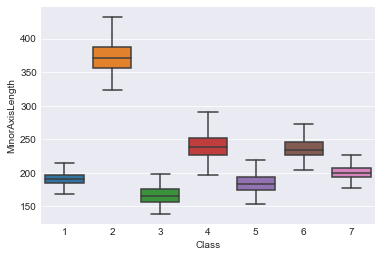

In [364]:
e1=data[data.Class ==1].MinorAxisLength
lr,ur=outlierdetection(e1)
data.drop(data.index[(data.Class ==1) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==1) &( data.MinorAxisLength >= ur)],inplace=True)
e4=data[data.Class == 2].MinorAxisLength
lr,ur=outlierdetection(e4)
data.drop(data.index[(data.Class ==2) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==2) &( data.MinorAxisLength >= ur)],inplace=True)
e5=data[data.Class == 3].MinorAxisLength
lr,ur=outlierdetection(e5)
data.drop(data.index[(data.Class ==3) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==3) &( data.MinorAxisLength >= ur)],inplace=True)
e7=data[data.Class == 4].MinorAxisLength
lr,ur=outlierdetection(e7)
data.drop(data.index[(data.Class ==4) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==4) &( data.MinorAxisLength >= ur)],inplace=True)
e6=data[data.Class == 5].MinorAxisLength
lr,ur=outlierdetection(e6)
data.drop(data.index[(data.Class ==5) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==5) &( data.MinorAxisLength >= ur)],inplace=True)
e2=data[data.Class == 6].MinorAxisLength
lr,ur=outlierdetection(e2)
data.drop(data.index[(data.Class ==6) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==6) &( data.MinorAxisLength >= ur)],inplace=True)
e3=data[data.Class == 7].MinorAxisLength
lr,ur=outlierdetection(e3)
data.drop(data.index[(data.Class ==7) &( data.MinorAxisLength <= lr)],inplace=True)
data.drop(data.index[(data.Class ==7) &( data.MinorAxisLength >= ur)],inplace=True)
sns.boxplot(x='Class',y='MinorAxisLength',data=data)

<AxesSubplot:xlabel='Class', ylabel='Compactness'>

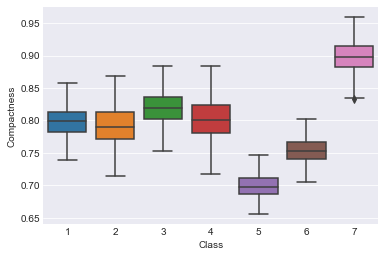

In [365]:
c1=data[data.Class == 1].Compactness
lr,ur=outlierdetection(c1)
data.drop(data.index[(data.Class ==1) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.Class ==1) &( data.Compactness >= ur)],inplace=True)
c2=data[data.Class == 2].Compactness
lr,ur=outlierdetection(c2)
data.drop(data.index[(data.Class ==2) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.Class ==2) &( data.Compactness >= ur)],inplace=True)
c3=data[data.Class == 3].Compactness
lr,ur=outlierdetection(c3)
data.drop(data.index[(data.Class ==3) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.Class ==3) &( data.Compactness >= ur)],inplace=True)
c4=data[data.Class == 4].Compactness
lr,ur=outlierdetection(c4)
data.drop(data.index[(data.Class ==4) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.Class ==4) &( data.Compactness >= ur)],inplace=True)
c5=data[data.Class ==5].Compactness
lr,ur=outlierdetection(c5)
data.drop(data.index[(data.Class ==5) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.Class ==5) &( data.Compactness >= ur)],inplace=True)
c6=data[data.Class == 6].Compactness
lr,ur=outlierdetection(c6)
data.drop(data.index[(data.Class ==6) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.Class ==6) &( data.Compactness >= ur)],inplace=True)
c7=data[data.Class == 7].Compactness
lr,ur=outlierdetection(c7)
data.drop(data.index[(data.Class ==7) &( data.Compactness <= lr)],inplace=True)
data.drop(data.index[(data.Class ==7) &( data.Compactness >= ur)],inplace=True)
sns.boxplot(x='Class',y='Compactness',data=data)

<AxesSubplot:xlabel='Class', ylabel='Eccentricity'>

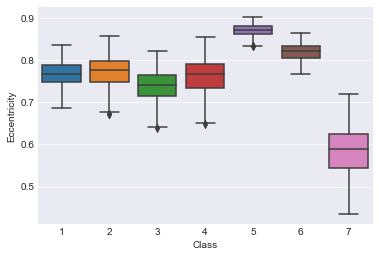

In [366]:
b1=data[data.Class == 1].Eccentricity
lr,ur=outlierdetection(b1)
data.drop(data.index[(data.Class ==1) &( data.Eccentricity <= lr)],inplace=True)
data.drop(data.index[(data.Class ==1) &( data.Eccentricity >= ur)],inplace=True)
b2=data[data.Class == 2].Eccentricity
lr,ur=outlierdetection(b2)
data.drop(data.index[(data.Class ==2) &( data.Eccentricity <= lr)],inplace=True)
data.drop(data.index[(data.Class ==2) &( data.Eccentricity >= ur)],inplace=True)
b3=data[data.Class == 3].Eccentricity
lr,ur=outlierdetection(b3)
data.drop(data.index[(data.Class ==3) &( data.Eccentricity <= lr)],inplace=True)
data.drop(data.index[(data.Class ==3) &( data.Eccentricity >= ur)],inplace=True)
b4=data[data.Class ==4].Eccentricity
lr,ur=outlierdetection(b4)
data.drop(data.index[(data.Class ==4) &( data.Eccentricity <= lr)],inplace=True)
data.drop(data.index[(data.Class ==4) &( data.Eccentricity >= ur)],inplace=True)
b5=data[data.Class == 5].Eccentricity
lr,ur=outlierdetection(b5)
data.drop(data.index[(data.Class ==5) &( data.Eccentricity <= lr)],inplace=True)
data.drop(data.index[(data.Class ==5) &( data.Eccentricity >= ur)],inplace=True)
b6=data[data.Class ==6].Eccentricity
lr,ur=outlierdetection(b6)
data.drop(data.index[(data.Class ==6) &( data.Eccentricity <= lr)],inplace=True)
data.drop(data.index[(data.Class ==6) &( data.Eccentricity >= ur)],inplace=True)
b7=data[data.Class == 7].Eccentricity
lr,ur=outlierdetection(b7)
data.drop(data.index[(data.Class ==7) &( data.Eccentricity <= lr)],inplace=True)
data.drop(data.index[(data.Class ==7) &( data.Eccentricity >= ur)],inplace=True)
sns.boxplot(x='Class',y='Eccentricity',data=data)

<AxesSubplot:xlabel='Class', ylabel='Area'>

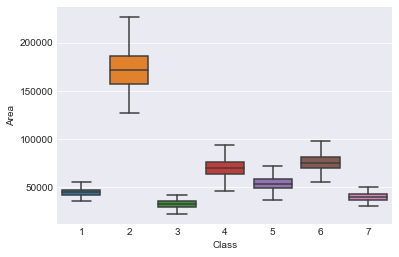

In [367]:
d1=data[data.Class == 1].Area
lr,ur=outlierdetection(d1)
data.drop(data.index[(data.Class ==1) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.Class ==1) &( data.Area >= ur)],inplace=True)
d2=data[data.Class == 2].Area
lr,ur=outlierdetection(d2)
data.drop(data.index[(data.Class ==2) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.Class ==2) &( data.Area >= ur)],inplace=True)
d3=data[data.Class == 3].Area
lr,ur=outlierdetection(d3)
data.drop(data.index[(data.Class ==3) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.Class ==3) &( data.Area >= ur)],inplace=True)
d4=data[data.Class == 4].Area
lr,ur=outlierdetection(d4)
data.drop(data.index[(data.Class ==4) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.Class ==4) &( data.Area >= ur)],inplace=True)
d5=data[data.Class == 5].Area
lr,ur=outlierdetection(d5)
data.drop(data.index[(data.Class ==5) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.Class ==5) &( data.Area >= ur)],inplace=True)
d6=data[data.Class == 6].Area
lr,ur=outlierdetection(d6)
data.drop(data.index[(data.Class ==6) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.Class ==6) &( data.Area >= ur)],inplace=True)
d7=data[data.Class == 7].Area
lr,ur=outlierdetection(d7)
data.drop(data.index[(data.Class ==7) &( data.Area <= lr)],inplace=True)
data.drop(data.index[(data.Class ==7) &( data.Area >= ur)],inplace=True)
sns.boxplot(x='Class',y='Area',data=data)

<AxesSubplot:xlabel='Class', ylabel='Perimeter'>

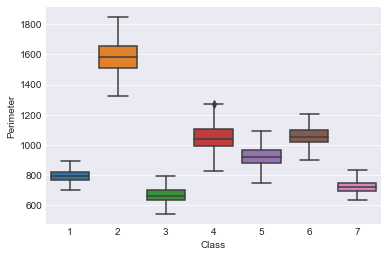

In [368]:
a1=data[data.Class ==1].Perimeter
lr,ur=outlierdetection(a1)
data.drop(data.index[(data.Class ==1) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==1) &( data.Perimeter >= ur)],inplace=True)
a2=data[data.Class == 2].Perimeter
lr,ur=outlierdetection(a2)
data.drop(data.index[(data.Class ==2) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==2) &( data.Perimeter >= ur)],inplace=True)
a3=data[data.Class == 3].Perimeter
lr,ur=outlierdetection(a3)
data.drop(data.index[(data.Class ==3) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==3) &( data.Perimeter >= ur)],inplace=True)
a4=data[data.Class == 4].Perimeter
lr,ur=outlierdetection(a4)
data.drop(data.index[(data.Class ==4) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==4) &( data.Perimeter >= ur)],inplace=True)
a5=data[data.Class == 5].Perimeter
lr,ur=outlierdetection(a5)
data.drop(data.index[(data.Class ==5) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==5) &( data.Perimeter >= ur)],inplace=True)
a6=data[data.Class == 6].Perimeter
lr,ur=outlierdetection(a6)
data.drop(data.index[(data.Class ==6) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==6) &( data.Perimeter >= ur)],inplace=True)
a7=data[data.Class == 7].Perimeter
lr,ur=outlierdetection(a7)
data.drop(data.index[(data.Class ==7) &( data.Perimeter <= lr)],inplace=True)
data.drop(data.index[(data.Class ==7) &( data.Perimeter >= ur)],inplace=True)
sns.boxplot(x='Class',y='Perimeter',data=data)

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Perimeter'}>,
        <AxesSubplot:title={'center':'MajorAxisLength'}>,
        <AxesSubplot:title={'center':'MinorAxisLength'}>],
       [<AxesSubplot:title={'center':'AspectRation'}>,
        <AxesSubplot:title={'center':'Eccentricity'}>,
        <AxesSubplot:title={'center':'ConvexArea'}>,
        <AxesSubplot:title={'center':'EquivDiameter'}>],
       [<AxesSubplot:title={'center':'Extent'}>,
        <AxesSubplot:title={'center':'Solidity'}>,
        <AxesSubplot:title={'center':'roundness'}>,
        <AxesSubplot:title={'center':'Compactness'}>],
       [<AxesSubplot:title={'center':'ShapeFactor1'}>,
        <AxesSubplot:title={'center':'ShapeFactor2'}>,
        <AxesSubplot:title={'center':'ShapeFactor3'}>,
        <AxesSubplot:title={'center':'ShapeFactor4'}>]], dtype=object)

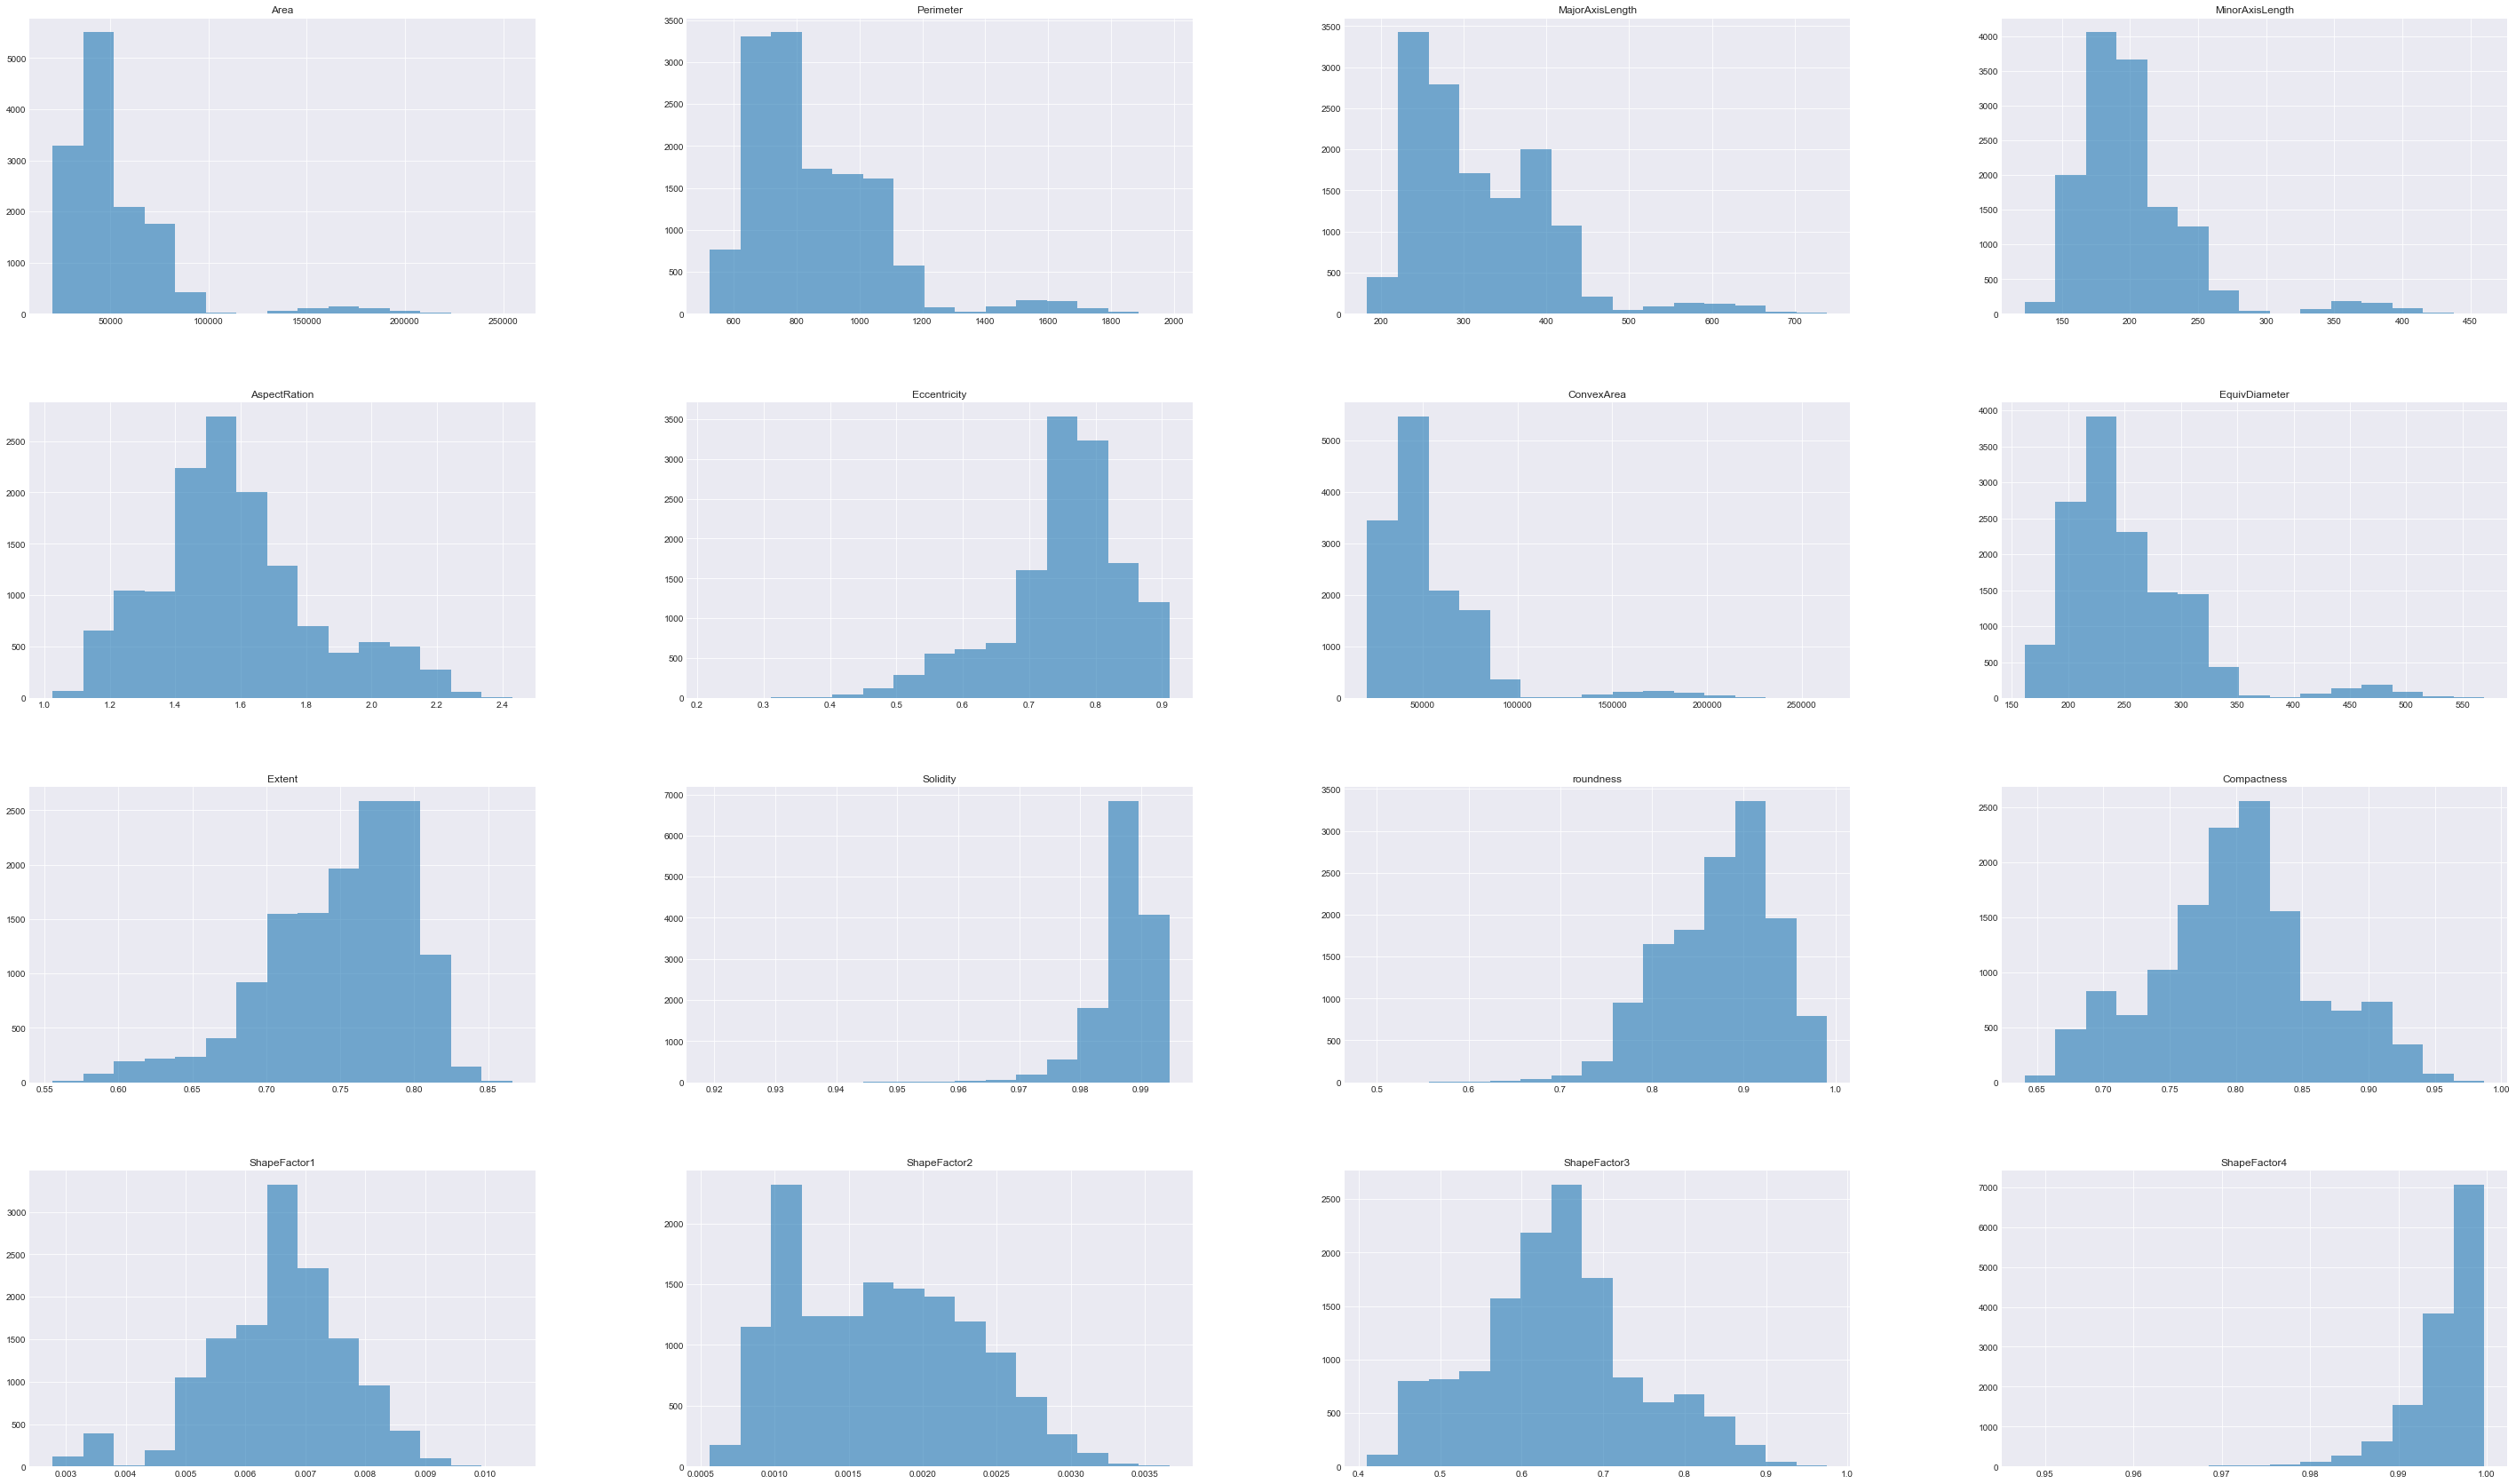

In [369]:
df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']].hist(bins=15 , figsize=(50,30), alpha=0.6)

# Finding correlation and removing

In [370]:
cormat = df.corr()
round(cormat,2)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.00,0.97,0.93,0.95,0.24,0.27,1.00,0.98,0.05,-0.20,-0.36,-0.27,-0.85,-0.64,-0.27,-0.36
Perimeter,0.97,1.00,0.98,0.91,0.39,0.39,0.97,0.99,-0.02,-0.30,-0.55,-0.41,-0.86,-0.77,-0.41,-0.43
MajorAxisLength,0.93,0.98,1.00,0.83,0.55,0.54,0.93,0.96,-0.08,-0.28,-0.60,-0.57,-0.77,-0.86,-0.57,-0.48
MinorAxisLength,0.95,0.91,0.83,1.00,-0.01,0.02,0.95,0.95,0.15,-0.16,-0.21,-0.02,-0.95,-0.47,-0.02,-0.26
AspectRation,0.24,0.39,0.55,-0.01,1.00,0.92,0.24,0.30,-0.37,-0.27,-0.77,-0.99,0.02,-0.84,-0.98,-0.45
Eccentricity,0.27,0.39,0.54,0.02,0.92,1.00,0.27,0.32,-0.32,-0.30,-0.72,-0.97,0.02,-0.86,-0.98,-0.45
ConvexArea,1.00,0.97,0.93,0.95,0.24,0.27,1.00,0.99,0.05,-0.21,-0.36,-0.27,-0.85,-0.64,-0.27,-0.36
EquivDiameter,0.98,0.99,0.96,0.95,0.30,0.32,0.99,1.00,0.03,-0.23,-0.44,-0.33,-0.89,-0.71,-0.33,-0.39
Extent,0.05,-0.02,-0.08,0.15,-0.37,-0.32,0.05,0.03,1.00,0.19,0.34,0.35,-0.14,0.24,0.35,0.15
Solidity,-0.20,-0.30,-0.28,-0.16,-0.27,-0.30,-0.21,-0.23,0.19,1.00,0.61,0.30,0.15,0.34,0.31,0.70


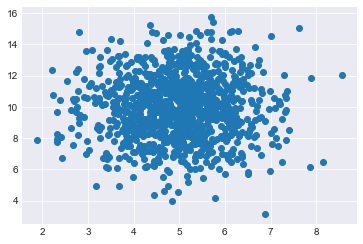

In [371]:
x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

<AxesSubplot:>

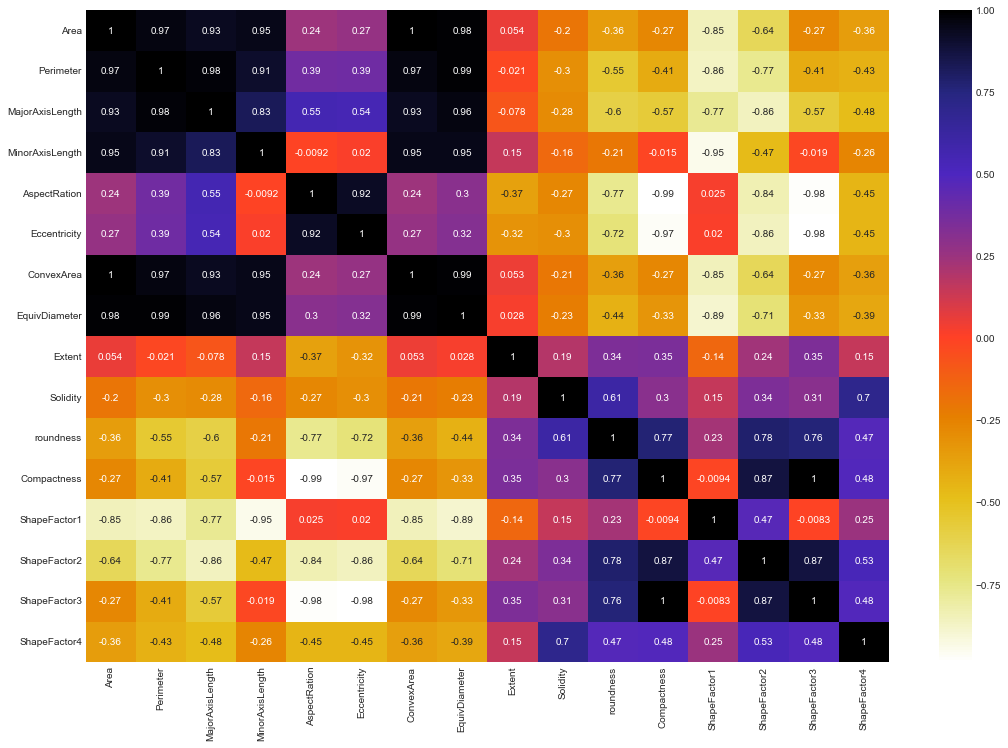

In [372]:
plt.figure(figsize=(18,12))
sns.heatmap(cormat, yticklabels='auto', annot=True, cmap=plt.cm.CMRmap_r)

In [373]:
###droping columns to see heatmap again
data.drop(['ConvexArea','Solidity', 'roundness', 'ShapeFactor4','Extent', 'AspectRation'], axis=1, inplace=True)

<AxesSubplot:>

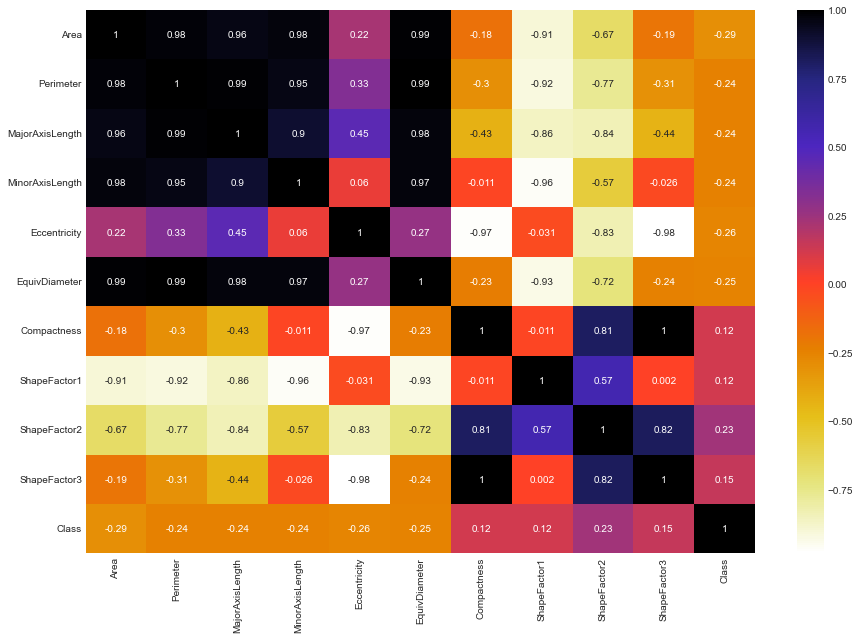

In [374]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), yticklabels='auto', annot=True, cmap=plt.cm.CMRmap_r)


# training and testing the data

In [375]:
x= data.iloc[:,:-1].values  
y= data.iloc[:, -1].values 
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 
#feature scaling
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
#Importing EvaluAtion Libraries
from sklearn import metrics
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix
from sklearn.metrics import classification_report


# knn classifier

In [376]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#predicting
y_pred=classifier.predict(x_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.83      0.92      0.87       124
           2       1.00      1.00      1.00       119
           3       0.93      0.86      0.89       144
           4       0.93      0.82      0.87       127
           5       1.00      1.00      1.00       105
           6       0.85      0.94      0.89       122
           7       0.96      0.94      0.95       116

    accuracy                           0.92       857
   macro avg       0.93      0.93      0.93       857
weighted avg       0.92      0.92      0.92       857



In [377]:
Evaluation=pd.DataFrame(['knn'],columns=['Algorithm'])

Evaluation.loc[0,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[0,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,knn,0.92182,0.92182,0.92182,0.92182


In [378]:
classifier.score(x_test,y_test)


0.9218203033838973

In [379]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[114   0   7   1   0   0   2]
 [  0 119   0   0   0   0   0]
 [ 18   0 124   0   0   0   2]
 [  2   0   0 104   0  21   0]
 [  0   0   0   0 105   0   0]
 [  0   0   0   7   0 115   0]
 [  4   0   3   0   0   0 109]]


<AxesSubplot:>

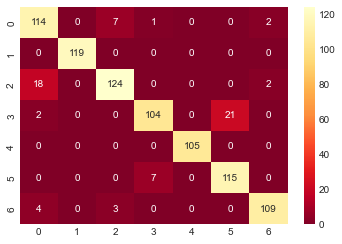

In [380]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd_r" ,fmt='g')

# Decision tree classifier

In [382]:
Evaluation.loc[1,'Algorithm']='Decision Tree'
Evaluation.loc[1,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[1,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,knn,0.921820,0.921820,0.921820,0.921820
1,Decision Tree,0.912485,0.912485,0.912485,0.912485


In [383]:
dtc_model.score(x_test,y_test)


0.912485414235706

In [384]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[110   0   9   2   0   0   3]
 [  0 119   0   0   0   0   0]
 [ 12   0 129   0   0   0   3]
 [  1   0   0 106   0  20   0]
 [  0   0   0   0 105   0   0]
 [  0   0   0  15   2 105   0]
 [  5   0   3   0   0   0 108]]


<AxesSubplot:>

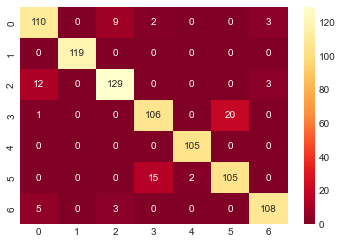

In [385]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd_r" ,fmt='g')

# naive bayes

In [386]:
from sklearn.naive_bayes import GaussianNB
cla = GaussianNB()
cla.fit(x_train, y_train)
#cla.score(x_test,y_test)
GaussianNB()
y_pred=cla.predict(x_test)
Evaluation.loc[2,'Algorithm']='Naive Bayes'
Evaluation.loc[2,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[2,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,knn,0.921820,0.921820,0.921820,0.921820
1,Decision Tree,0.912485,0.912485,0.912485,0.912485
2,Naive Bayes,0.898483,0.898483,0.898483,0.898483


In [387]:
cla.score(x_test,y_test)

0.8984830805134189

In [388]:
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[114   0   7   1   0   0   2]
 [  0 119   0   0   0   0   0]
 [ 16   0 125   0   0   0   3]
 [  3   0   0  92   0  32   0]
 [  1   0   0   0 104   0   0]
 [  0   0   0  15   0 107   0]
 [  5   0   2   0   0   0 109]]


<AxesSubplot:>

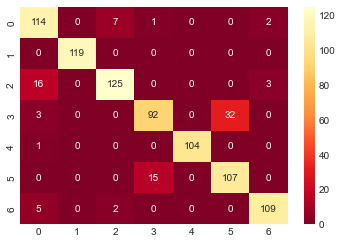

In [389]:
 sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd_r" ,fmt='g')

# random forest  

In [390]:
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(x_train, y_train)
RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
y_pred=classifier1.predict(x_test)
Evaluation.loc[3,'Algorithm']='RF'
Evaluation.loc[3,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[3,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[3,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[3,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,knn,0.921820,0.921820,0.921820,0.921820
1,Decision Tree,0.912485,0.912485,0.912485,0.912485
2,Naive Bayes,0.898483,0.898483,0.898483,0.898483
3,RF,0.919487,0.919487,0.919487,0.919487


In [391]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.84      0.91      0.87       124
           2       1.00      1.00      1.00       119
           3       0.91      0.87      0.89       144
           4       0.91      0.83      0.87       127
           5       0.99      1.00      1.00       105
           6       0.85      0.91      0.88       122
           7       0.97      0.94      0.96       116

    accuracy                           0.92       857
   macro avg       0.92      0.92      0.92       857
weighted avg       0.92      0.92      0.92       857



In [392]:
classifier1.score(x_test,y_test)

0.9194865810968494

In [393]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[113   0   9   1   0   0   1]
 [  0 119   0   0   0   0   0]
 [ 17   0 125   0   0   0   2]
 [  1   0   0 106   0  20   0]
 [  0   0   0   0 105   0   0]
 [  0   0   0  10   1 111   0]
 [  4   0   3   0   0   0 109]]


<AxesSubplot:>

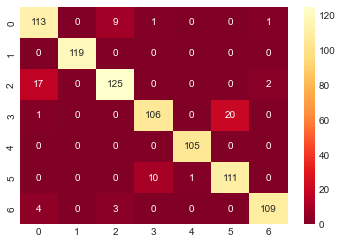

In [394]:
 sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd_r" ,fmt='g')

# logistic regression

In [395]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression(random_state=0)
regressor.fit(x_train,y_train)
LogisticRegression(random_state=0)
y_pred=regressor.predict(x_test)
regressor.score(x_test,y_test)

C:\Users\92318\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9276546091015169

In [396]:
report=classification_report(y_test,y_pred)
print(report)


              precision    recall  f1-score   support

           1       0.81      0.94      0.87       124
           2       1.00      1.00      1.00       119
           3       0.93      0.86      0.90       144
           4       0.94      0.84      0.89       127
           5       1.00      1.00      1.00       105
           6       0.87      0.94      0.91       122
           7       0.98      0.93      0.96       116

    accuracy                           0.93       857
   macro avg       0.93      0.93      0.93       857
weighted avg       0.93      0.93      0.93       857



In [397]:
Evaluation.loc[4,'Algorithm']='LR'
Evaluation.loc[4,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[4,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[4,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[4,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,knn,0.921820,0.921820,0.921820,0.921820
1,Decision Tree,0.912485,0.912485,0.912485,0.912485
2,Naive Bayes,0.898483,0.898483,0.898483,0.898483
3,RF,0.919487,0.919487,0.919487,0.919487
4,LR,0.927655,0.927655,0.927655,0.927655


In [398]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[117   0   7   0   0   0   0]
 [  0 119   0   0   0   0   0]
 [ 18   0 124   0   0   0   2]
 [  3   0   0 107   0  17   0]
 [  0   0   0   0 105   0   0]
 [  0   0   0   7   0 115   0]
 [  6   0   2   0   0   0 108]]


<AxesSubplot:>

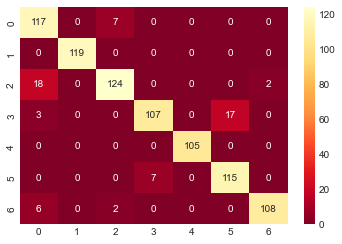

In [399]:
 sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd_r" ,fmt='g')

# Support vector machine (SVM) classifier

In [400]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
SVC(kernel='linear', random_state=0)
y_pred=classifier.predict(x_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.81      0.94      0.87       124
           2       1.00      1.00      1.00       119
           3       0.93      0.87      0.90       144
           4       0.97      0.84      0.90       127
           5       1.00      0.99      1.00       105
           6       0.88      0.98      0.92       122
           7       0.98      0.93      0.96       116

    accuracy                           0.93       857
   macro avg       0.94      0.94      0.94       857
weighted avg       0.94      0.93      0.93       857



In [401]:
Evaluation.loc[5,'Algorithm']='SVM_linear'
Evaluation.loc[5,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[5,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[5,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[5,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation


,Algorithm,Precision,Recall,F1 Score,Accuracy
0,knn,0.921820,0.921820,0.921820,0.921820
1,Decision Tree,0.912485,0.912485,0.912485,0.912485
2,Naive Bayes,0.898483,0.898483,0.898483,0.898483
3,RF,0.919487,0.919487,0.919487,0.919487
4,LR,0.927655,0.927655,0.927655,0.927655
5,SVM_linear,0.932322,0.932322,0.932322,0.932322


In [402]:
classifier.score(x_test,y_test)

0.9323220536756126

In [403]:
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[117   0   7   0   0   0   0]
 [  0 119   0   0   0   0   0]
 [ 17   0 125   0   0   0   2]
 [  3   0   0 107   0  17   0]
 [  1   0   0   0 104   0   0]
 [  0   0   0   3   0 119   0]
 [  6   0   2   0   0   0 108]]


<AxesSubplot:>

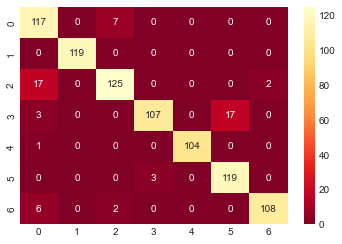

In [404]:
 sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd_r" ,fmt='g')

In [405]:
from sklearn.svm import SVC
cl = SVC(kernel = 'rbf')
cl.fit(x_train, y_train)
cl.score(x_test,y_test)

0.9148191365227538

In [406]:
y_pred=cl.predict(x_test)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.82      0.93      0.87       124
           2       1.00      1.00      1.00       119
           3       0.91      0.87      0.89       144
           4       0.91      0.79      0.84       127
           5       1.00      1.00      1.00       105
           6       0.82      0.92      0.87       122
           7       0.98      0.93      0.96       116

    accuracy                           0.91       857
   macro avg       0.92      0.92      0.92       857
weighted avg       0.92      0.91      0.91       857



In [407]:
cm=confusion_matrix(y_test,y_pred)
print(cm)


[[115   0   9   0   0   0   0]
 [  0 119   0   0   0   0   0]
 [ 17   0 125   0   0   0   2]
 [  3   0   0 100   0  24   0]
 [  0   0   0   0 105   0   0]
 [  0   0   0  10   0 112   0]
 [  5   0   3   0   0   0 108]]


<AxesSubplot:>

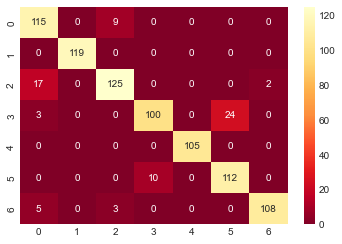

In [408]:
 sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd_r" ,fmt='g')

In [409]:
Evaluation.loc[6,'Algorithm']='SVM_rb funcion'
Evaluation.loc[6,'Precision']=metrics.precision_score(y_test, y_pred, average='micro')
Evaluation.loc[6,'Recall']=metrics.recall_score(y_test, y_pred, average='micro')
Evaluation.loc[6,'F1 Score']=metrics.f1_score(y_test, y_pred, average='micro')
Evaluation.loc[6,'Accuracy']=metrics.accuracy_score(y_test,y_pred)
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,knn,0.921820,0.921820,0.921820,0.921820
1,Decision Tree,0.912485,0.912485,0.912485,0.912485
2,Naive Bayes,0.898483,0.898483,0.898483,0.898483
3,RF,0.919487,0.919487,0.919487,0.919487
4,LR,0.927655,0.927655,0.927655,0.927655
5,SVM_linear,0.932322,0.932322,0.932322,0.932322
6,SVM_rb funcion,0.914819,0.914819,0.914819,0.914819


# Comparing all classifiers results
for precision

<AxesSubplot:xlabel='Algorithm', ylabel='Precision'>

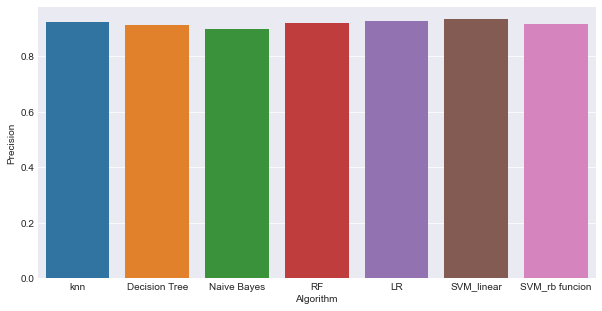

In [410]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='Precision',data=Evaluation)

for accuracy

<AxesSubplot:xlabel='Algorithm', ylabel='Accuracy'>

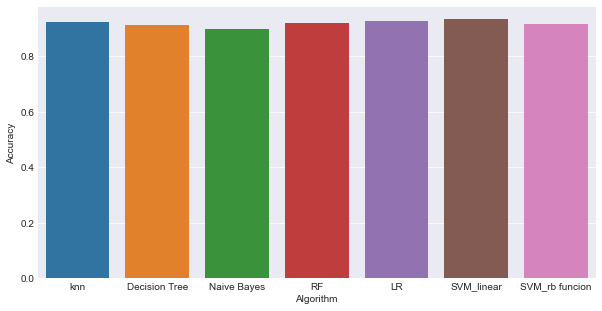

In [411]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='Accuracy',data=Evaluation)

for recall

<AxesSubplot:xlabel='Algorithm', ylabel='Recall'>

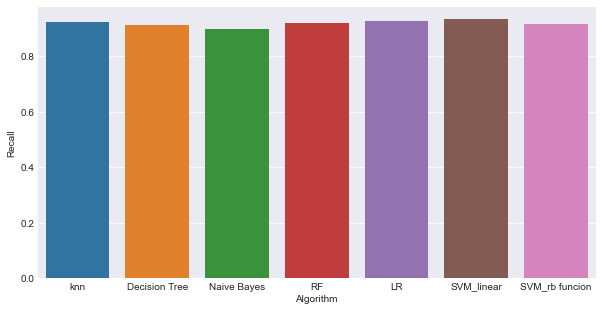

In [412]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='Recall',data=Evaluation)

for f1 score

<AxesSubplot:xlabel='Algorithm', ylabel='F1 Score'>

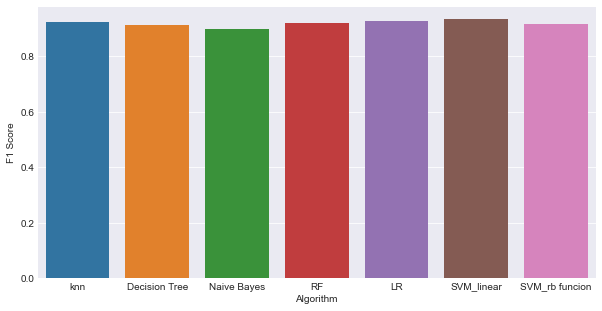

In [413]:
plt.figure(figsize=(10,5))
sns.barplot(x='Algorithm',y='F1 Score',data=Evaluation)

In [414]:
Evaluation[Evaluation.Recall==Evaluation.Recall.min()]

,Algorithm,Precision,Recall,F1 Score,Accuracy
2,Naive Bayes,0.898483,0.898483,0.898483,0.898483


In [415]:
Evaluation[Evaluation.Recall==Evaluation.Recall.max()]

,Algorithm,Precision,Recall,F1 Score,Accuracy
5,SVM_linear,0.932322,0.932322,0.932322,0.932322


In [416]:
Evaluation[Evaluation.Precision==Evaluation.Precision.min()]

,Algorithm,Precision,Recall,F1 Score,Accuracy
2,Naive Bayes,0.898483,0.898483,0.898483,0.898483


In [417]:
Evaluation[Evaluation.Precision==Evaluation.Precision.max()]

,Algorithm,Precision,Recall,F1 Score,Accuracy
5,SVM_linear,0.932322,0.932322,0.932322,0.932322


In [418]:
Evaluation[Evaluation.Accuracy==Evaluation.Accuracy.min()]

,Algorithm,Precision,Recall,F1 Score,Accuracy
2,Naive Bayes,0.898483,0.898483,0.898483,0.898483


In [419]:
Evaluation[Evaluation.Accuracy==Evaluation.Accuracy.max()]

,Algorithm,Precision,Recall,F1 Score,Accuracy
5,SVM_linear,0.932322,0.932322,0.932322,0.932322


In [420]:
Evaluation

,Algorithm,Precision,Recall,F1 Score,Accuracy
0,knn,0.921820,0.921820,0.921820,0.921820
1,Decision Tree,0.912485,0.912485,0.912485,0.912485
2,Naive Bayes,0.898483,0.898483,0.898483,0.898483
3,RF,0.919487,0.919487,0.919487,0.919487
4,LR,0.927655,0.927655,0.927655,0.927655
5,SVM_linear,0.932322,0.932322,0.932322,0.932322
6,SVM_rb funcion,0.914819,0.914819,0.914819,0.914819
